# Example for a simple neural network

## Trump by maximum color (2 colors)

The inputs to the network are the number of cards of each color. The network should learn to select the color with the largest number of cards of that color.

For a simple example, let us assume that there are 5 cards in total for a player and only 2 colors.

### Libraries

We use the keras library for building, training and evaluating the network. A tutorial for keras can be found on (https://keras.io/) or https://www.tensorflow.org/guide/keras. There are different implementations of keras, here I will use the one build on tensorflow.


In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Output function

We have to encode the output somehow, for two classes, the simplest solution is a single variable that should be 0 if there are more cards of color 0 and 1 if there are more cards of color 1.

### Training and label data.

So we can prepare some training data. In this simple case, all the possible configurations are actually known.


In [3]:
x_train = np.array([
    [0, 5],
    [1, 4],
    [2, 3],
    [3, 2],
    [4, 1],
    [5, 0],
], dtype=np.float32)
y_train = np.array([1, 1, 1, 0, 0, 0,], dtype=np.float32)
print(x_train)
print(y_train)

[[0. 5.]
 [1. 4.]
 [2. 3.]
 [3. 2.]
 [4. 1.]
 [5. 0.]]
[1. 1. 1. 0. 0. 0.]


### Normalisation

Input data can have different ranges. It is always a good idea (in other words absolutely essential) to normalize the input data. This is usually done into the range 0..1 or -1..1

In [4]:
x_train = x_train / 5.0
print(x_train)

[[0.  1. ]
 [0.2 0.8]
 [0.4 0.6]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]]


In [5]:
x_train.shape

(6, 2)

### A first network.

We will start with a very simple network, where we connect the inputs directly to the output. So there will be 2 variables, the weights for the connection and the bias. The output function is a sigmoid, which takes values between 0 and 1.

With keras, we first have to create the type of model we want (Sequential), and can then add layers. In the tensorflow implementation, we have to add the input_shape parameter in the first layer to tell it the format of the input. This does not include the batch dimension.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, activation='sigmoid', input_shape=[2]))

/Users/timon/.pyenv/versions/dl4g/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Next we have to compile the model and tell it what loss function and optimizer we want to have. We will take a mean squared error for loss function first. (This is actually not optimal and will be corrected in an exercise).

Besides the loss, we usually want to look at some metrics. Here we choose accuracy, that measures how often the network makes the correct decision (see last lecture).

In [7]:
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])


We can print some details about the model.

In [8]:
model.summary()
print(model.get_weights())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

[array([[-1.0780274],
       [-1.071946 ]], dtype=float32), array([0.], dtype=float32)]


We can either train one batch, or we can use fit to train repeatedly. The result from the training is the loss function and the metric.

In [9]:
model.train_on_batch(x_train, y_train)

[array(0.30994585, dtype=float32), array(0.5, dtype=float32)]

We can now try to fit the data in minibatches multiple times. This will calculate the weights, so as to minimize the loss. We might not always get a good result in the first try and even this very simple network seems to need a large number of training steps.

In [10]:
model.fit(x_train, y_train, epochs=100, batch_size=6)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5000 - loss: 0.3098
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 0.3096
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5000 - loss: 0.3094
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5000 - loss: 0.3092
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5000 - loss: 0.3090
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5000 - loss: 0.3088
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5000 - loss: 0.3086
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 0.3084
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 0.3082
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5000 - loss: 0.3080
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 0.3078
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5000 - lo

We can predict the values from the training value. Why are the results floating point number and not 0 or 1? Does the result seem likely?

In [11]:
model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.29474062],
       [0.28959766],
       [0.2845082 ],
       [0.2794731 ],
       [0.27449283],
       [0.26956815]], dtype=float32)

We can also print the found weights for each layer:

In [12]:
for layer in model.layers:
    weights = layer.get_weights()
    print(layer.name)
    print(weights)

dense
[array([[-1.0903776 ],
       [-0.96603286]], dtype=float32), array([0.09356276], dtype=float32)]


How do we find the actual predictions? We use a threshold on the output of the sigmoid function.

In [13]:
model.predict(x_train) > 0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False]])

### A larger network

Lets try a more complicated network with two hidden layers.

In [14]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_shape=[2]))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])

And train it again...

In [15]:
model.fit(x_train, y_train, epochs=200, batch_size=6)

Epoch 1/200


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5000 - loss: 0.2547
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.2546
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.2544
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.2542
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.2541
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.2539
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.2537
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.2536
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.2534
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.2532
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.2531
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.2529


The results are not necessarly better, how does the prediction look now?

In [16]:
model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.48882976],
       [0.4961097 ],
       [0.47197187],
       [0.4011635 ],
       [0.42966792],
       [0.44795236]], dtype=float32)

In [17]:
for layer in model.layers:
    weights = layer.get_weights()
    print(layer)
    print(weights)

<Dense name=dense_1, built=True>
[array([[-0.6104649 , -0.11350176],
       [ 0.73114324,  0.9613214 ]], dtype=float32), array([0.07478556, 0.03273025], dtype=float32)]
<Dense name=dense_2, built=True>
[array([[ 0.7776954 , -1.18779   ],
       [-0.01529608,  0.4107743 ]], dtype=float32), array([-0.04563887,  0.18150689], dtype=float32)]
<Dense name=dense_3, built=True>
[array([[-0.14181603],
       [-1.3471451 ]], dtype=float32), array([0.03556861], dtype=float32)]


The larger network, does not seem to work better as the simpler one. Or is it maybe not large enough?

The problem is not the network, but the data, we just do not have enough data. So lets try to make up some more data artificially.


In [18]:
x_new = np.random.random(size=(10000,2))
y_new = np.zeros(10000, dtype=np.float32)
condition = (x_new[:,1] > x_new[:,0])
y_new[condition] = 1.0

In [19]:
model.fit(x_new, y_new, epochs=100, batch_size=100)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.6146 - loss: 0.2236
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.7848 - loss: 0.2157
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.8202 - loss: 0.2104
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.8368 - loss: 0.2035
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.8520 - loss: 0.1979
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.8642 - loss: 0.1905
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.8810 - loss: 0.1840
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.8947 - loss: 0.1777
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9071 - loss: 0.1704
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9251 - loss: 0.1647
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9272 - loss: 0.1580
Epoch 12/100
100/10

That seems better. Lets look how it performs on our original data.

In [20]:
model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0.9986818 ],
       [0.99251163],
       [0.95865595],
       [0.02679891],
       [0.01845099],
       [0.02047551]], dtype=float32)

### Evaluation

We might want to check how the network performs on any data. For this, keras provides the evaluate function that will 
evaluate the loss and the metrics. So of course label (y) data is needed for that. 

In [21]:
model.evaluate(x_new, y_new)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.9978 - loss: 0.0201


[0.02013344131410122, 0.9984999895095825]

Of course, we would normally do that on validation or test data not used during training.

In [22]:
x_val_new = np.random.random(size=(5000,2))
y_val_new = np.zeros(5000, dtype=np.float32)
y_val_new[x_val_new[:,1] > x_val_new[:,0]] = 1.0
model.evaluate(x_val_new, y_val_new)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.9976 - loss: 0.0219


[0.020534705370664597, 0.9983999729156494]

### Visualisation

It is essential to visualise the training process to see what is going on. In Keras, an easy method to do this is to use the history object that is returned from fit. It contains the metrics and the loss.

We will also split our data into training and validation for this test. We rebuild the model, so that it is initialized again. Otherwise we would just continue with the weights from the previous fit.

In [23]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_shape=[2]))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_new, y_new, validation_split=0.25, epochs=50, batch_size=100)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5038 - loss: 0.2500 - val_accuracy: 0.5052 - val_loss: 0.2500
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.5070 - loss: 0.2500 - val_accuracy: 0.5052 - val_loss: 0.2500
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.5126 - loss: 0.2500 - val_accuracy: 0.5052 - val_loss: 0.2500
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.5120 - loss: 0.2500 - val_accuracy: 0.5052 - val_loss: 0.2500
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.5185 - loss: 0.2499 - val_accuracy: 0.5052 - val_loss: 0.2500
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.4998 - loss: 0.2500 - val_accuracy: 0.5052 - val_loss: 0.2500
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.5027 - loss: 0.2500 - val_accuracy: 0.5052 - val_loss: 0.2500
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.5113 - loss: 0.2499 - val_accuracy: 0.50

In [24]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


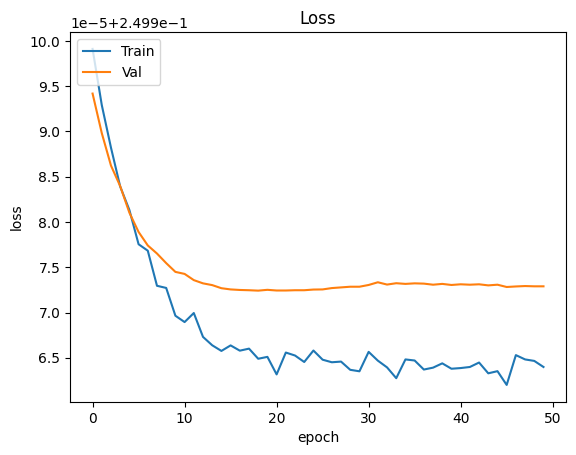

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')

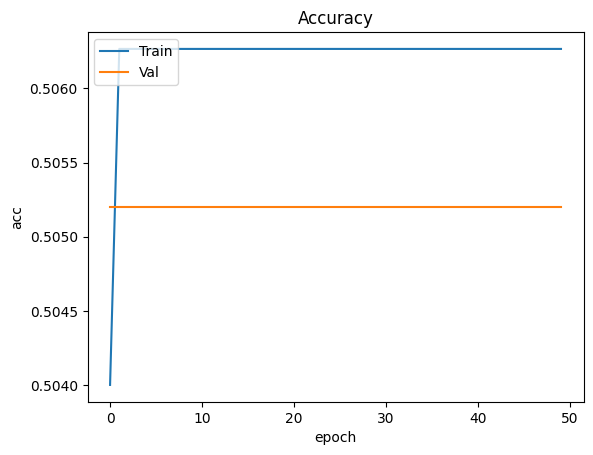

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

## Exercise: Correct loss function

The loss function used above (mse) is not optimal. A better loss function would be the crossentropy. Change the network to use that loss function.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_shape=[2]))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_new, y_new, validation_split=0.25, epochs=50, batch_size=100)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0620 - loss: 0.7055 - val_accuracy: 0.1512 - val_loss: 0.7018
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.1845 - loss: 0.7012 - val_accuracy: 0.2800 - val_loss: 0.6989
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.3159 - loss: 0.6983 - val_accuracy: 0.3616 - val_loss: 0.6972
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.3827 - loss: 0.6970 - val_accuracy: 0.4212 - val_loss: 0.6962
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.4191 - loss: 0.6960 - val_accuracy: 0.4564 - val_loss: 0.6955
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.4694 - loss: 0.6952 - val_accuracy: 0.4836 - val_loss: 0.6950
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.4892 - loss: 0.6949 - val_accuracy: 0.4948 - val_loss: 0.6946
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.4777 - loss: 0.6948 - val_accuracy: 0.50

## Exercise: Maximum of 4 colors

Implement a network that will receive 4 colors and has to select one of them.

This will require a change of the labels (y) that now take values of 0, 1, 2 or 3. However, networks do not use labels in that form directly for multi class classification, but use 1-hot encoded or categorical data instead.

In keras there is a function `keras.utils.to_categorical` that can be used for that.

The last layer in the network should then no longer be sigmoid, but the softmax function. And we need the multiclass form of the crossentropy function, which in keras is called `categorical_crossentropy`.


In [28]:
x_train= np.random.random(size=(5000,4))
y_train_label = np.argmax(x_train, axis=1)

y_train = keras.utils.to_categorical(y_train_label, num_classes=4)

model = keras.Sequential()
model.add(keras.layers.Dense(8, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(4, activation='sigmoid')) # match the target variables (one neuron per category)

model.compile(loss='categorical_crossentropy', # Multiclass classification loss
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.2938 - loss: 1.3560
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.7059 - loss: 1.2109
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.7578 - loss: 1.0266
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.7919 - loss: 0.8359
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.8271 - loss: 0.6752
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.8602 - loss: 0.5648
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.8975 - loss: 0.4756
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.9180 - loss: 0.4241
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.9329 - loss: 0.3681
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.9446 - loss: 0.3282
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.9460 - loss: 0.3055
Epoch 12/20
157/157 ━━━━━━━━━━

### Performance & Evaluation

In [29]:
# Testing the model with a sample input
x_test = np.random.random(size=(10, 4))
y_test_label = np.argmax(x_test, axis=1)
y_test = keras.utils.to_categorical(y_test_label, num_classes=4)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predict
predictions = model.predict(x_test)
print("Predictions:", np.argmax(predictions, axis=1))
print("True Labels:", y_test_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.1409
Test Loss: 0.1409, Test Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predictions: [2 0 0 2 1 3 0 2 3 3]
True Labels: [2 0 0 2 1 3 0 2 3 3]


## Exercise: Implement a ML Network to learn trump from features

We would like to train a network to **get the trump** from some features. (We could use the cards directly, but this is deep learning and we will see more of that in next lesson :-) )

As features we can use the **number of cards of a color** as before and some of the features from last lecture. For keras all input features should be floating point numbers. Also we need numpy arrays and not pandas. To get the array from a panda, the property `values` can be used.

In [55]:
import pandas as pd
from pathlib import Path

path_to_data = Path('../data')
# Import only a fraction of data for efficient testing
data = pd.read_csv(path_to_data / '2018_10_18_trump.csv', header=None, nrows=1000)
cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

# Forehand (yes = 1, no = 0)
forehand = ['FH']

user  = ['user']
trump = ['trump']

feature_columns = forehand

data.columns = cards + forehand + user + trump
data.drop('user', axis='columns', inplace=True)
data.head()


,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
0,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,6
1,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,5
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,6
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,5
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,4


Continue as follows:
- Calculate features, 
- add them to the data set
- drop the columns not used
- convert to numpy array
- build a network and train

In [56]:
data['diamonds_count'] = data.iloc[:, 0:9].sum(axis=1)
feature_columns.append('diamonds_count')

data['hearts_count'] = data.iloc[:, 9:18].sum(axis=1)
feature_columns.append('hearts_count')

data['spades_count'] = data.iloc[:, 18:27].sum(axis=1)
feature_columns.append('spades_count')

data['clubs_count'] = data.iloc[:, 27:36].sum(axis=1)
feature_columns.append('clubs_count')

data

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,C9,C8,C7,C6,FH,trump,diamonds_count,hearts_count,spades_count,clubs_count
0,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,6,4,0,3,2
1,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,5,1,4,2,2
2,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,6,2,2,2,3
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,5,0,3,3,3
4,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,1,4,2,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,6,1,2,3,3
996,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,3,3,2,1,3
997,1,0,1,1,0,0,0,1,0,0,...,0,0,1,0,1,4,4,0,2,3
998,0,0,1,0,1,0,0,0,0,0,...,1,0,1,0,1,2,2,1,4,2


In [57]:
for color in 'DHSC':
    
    # Jack and nine combination
    new_col_J9 = '{}_J9'.format(color)
    data[new_col_J9]  = data['{}J'.format(color)] & data['{}9'.format(color)]
    feature_columns.append(new_col_J9)
    
    # Exercise: Add other features here such as the combination of Ace-King-Queen (Dreiblatt).
    # Ace-King-Queen (Dreiblatt) combination
    new_col_AKQ = '{}_AKQ'.format(color)
    data[new_col_AKQ]  = data['{}A'.format(color)] & data['{}K'.format(color)] & data['{}Q'.format(color)]
    feature_columns.append(new_col_AKQ)
    
data.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,spades_count,clubs_count,D_J9,D_AKQ,H_J9,H_AKQ,S_J9,S_AKQ,C_J9,C_AKQ
0,0,0,0,1,1,0,1,1,0,0,...,3,2,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,2,2,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,2,3,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,3,3,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,1,...,1,1,0,0,0,1,0,0,0,0


In [58]:
data = data.drop(cards, axis=1)
data.head()

,FH,trump,diamonds_count,hearts_count,spades_count,clubs_count,D_J9,D_AKQ,H_J9,H_AKQ,S_J9,S_AKQ,C_J9,C_AKQ
0,0,6,4,0,3,2,0,0,0,0,0,0,0,0
1,0,5,1,4,2,2,0,0,0,0,0,0,0,0
2,0,6,2,2,2,3,0,0,0,0,0,0,0,0
3,0,5,0,3,3,3,0,0,0,0,0,0,0,0
4,1,4,2,5,1,1,0,0,0,1,0,0,0,0


### One-Hot-Encode Trump Column

In [59]:
data.trump = data.trump.astype('category')
data.trump = data.trump.cat.rename_categories({0: 'DIAMONDS', 1: 'HEARTS', 2: 'SPADES', 3:'CLUBS',
                                  4: 'OBE_ABE', 5: 'UNE_UFE', 6: 'PUSH', 10: 'PUSH'})

data.head()

,FH,trump,diamonds_count,hearts_count,spades_count,clubs_count,D_J9,D_AKQ,H_J9,H_AKQ,S_J9,S_AKQ,C_J9,C_AKQ
0,0,PUSH,4,0,3,2,0,0,0,0,0,0,0,0
1,0,UNE_UFE,1,4,2,2,0,0,0,0,0,0,0,0
2,0,PUSH,2,2,2,3,0,0,0,0,0,0,0,0
3,0,UNE_UFE,0,3,3,3,0,0,0,0,0,0,0,0
4,1,OBE_ABE,2,5,1,1,0,0,0,1,0,0,0,0


In [60]:
data = pd.get_dummies(data, ['trump', ])
data.head()

,FH,diamonds_count,hearts_count,spades_count,clubs_count,D_J9,D_AKQ,H_J9,H_AKQ,S_J9,S_AKQ,C_J9,C_AKQ,trump_DIAMONDS,trump_HEARTS,trump_SPADES,trump_CLUBS,trump_OBE_ABE,trump_UNE_UFE,trump_PUSH
0,0,4,0,3,2,0,0,0,0,0,0,0,0,False,False,False,False,False,False,True
1,0,1,4,2,2,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False
2,0,2,2,2,3,0,0,0,0,0,0,0,0,False,False,False,False,False,False,True
3,0,0,3,3,3,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False
4,1,2,5,1,1,0,0,0,1,0,0,0,0,False,False,False,False,True,False,False


### Define Features & Target Values

In [61]:
# Split into features (X) and target (y)
X = data[feature_columns]
y = data[
    [
        "trump_DIAMONDS",
        "trump_HEARTS",
        "trump_SPADES",
        "trump_CLUBS",
        "trump_OBE_ABE",
        "trump_UNE_UFE",
        "trump_PUSH",
    ]
]

### Normalization

In [62]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

### Define Keras Model

In [74]:
model = keras.Sequential()
model.add(keras.layers.Dense(26, activation='relu', input_shape=(X_train_normalized.shape[1],)))
model.add(keras.layers.Dense(26, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax')) # match the target variables (one neuron per category)

model.compile(loss='categorical_crossentropy', # Multiclass classification loss
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train_normalized, y_train, epochs=50, batch_size=16)

Epoch 1/50


/Users/timon/.pyenv/versions/dl4g/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.3527 - loss: 1.8777 
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.3850 - loss: 1.7145
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.3984 - loss: 1.6169
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.4213 - loss: 1.5657
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.4718 - loss: 1.5439
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.4954 - loss: 1.4766
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.5408 - loss: 1.3986
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.5515 - loss: 1.3287
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.5226 - loss: 1.3324
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.5344 - loss: 1.3252
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.5491 - loss: 1.2767
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accurac

In [81]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_normalized, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5264 - loss: 1.2500
Test Loss: 1.2828, Test Accuracy: 0.5250
